## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
! pip install xlrd

Defaulting to user installation because normal site-packages is not writeable


In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')

# Load data

In [3]:
youtube_data = pd.read_excel('USvideos.xlsx')

In [4]:
youtube_data.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Attributes

In [5]:
youtube_data.shape

(40949, 16)

In [6]:
youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [7]:
youtube_data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [8]:
youtube_data.nunique()

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [9]:
youtube_data["category_id"].nunique()

16

## Multiple videos with the same ID?

In [10]:
youtube_data['video_id'].nunique() 

6351

In [11]:
youtube_data['video_id'].value_counts()

j4KvrAUjn6c    30
8h--kFui1JA    29
QBL8IRJ5yHU    29
t4pRQ0jn23Q    29
MAjY8mCTXWk    29
               ..
QDHcA33yT0I     1
6XxA-4Jp7AU     1
GIRJck1pVRA     1
Wpr2WvQn-kg     1
yz7Xq3T0YPs     1
Name: video_id, Length: 6351, dtype: int64

In [12]:
youtube_data["category_id"].unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43],
      dtype=int64)

In [13]:
youtube_data["category_id"].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

In [14]:
youtube_data["category_id"] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
40944    False
40945    False
40946    False
40947     True
40948    False
Name: category_id, Length: 40949, dtype: bool

In [15]:
# youtube_data.loc[(youtube_data["category_id"] == 1)] = 'Film and Animation'

## Boolean mask

In [16]:
youtube_data["category_id"] =='Film and Animation'

0        False
1        False
2        False
3        False
4        False
         ...  
40944    False
40945    False
40946    False
40947    False
40948    False
Name: category_id, Length: 40949, dtype: bool

In [17]:
youtube_data["category_name"] = np.nan

In [18]:
youtube_data.loc[(youtube_data["category_id"] == 1), "category_name"] = 'Film and Animation'
youtube_data.loc[(youtube_data["category_id"] == 2), "category_name"] = 'Cars and Vehicles'
youtube_data.loc[(youtube_data["category_id"] == 10), "category_name"] = 'Music'

In [19]:
youtube_data.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,NaN
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",NaN
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,NaN
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,NaN
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,NaN


In [20]:
youtube_data.loc[(youtube_data["category_id"] == 2)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
30,U0hAC8O7RoI,17.14.11,"I TOOK THE $3,000,000 LAMBO TO CARMAX! They of...",hp_overload,2,2017-11-13T01:43:12.000Z,"carmax|""lamborghini miura""|""miura carmax""|""lam...",98378,4035,495,486,https://i.ytimg.com/vi/U0hAC8O7RoI/default.jpg,False,False,False,Finally took the Miura to Carmax! Hope you enj...,Cars and Vehicles
58,pjuPpVLXDQg,17.14.11,Train Swipes Parked Vehicle,ViralHog,2,2017-11-13T00:46:11.000Z,"2017|""viralhog""|""Crash""|""Fail""|""Featured""|""tra...",7265,89,8,22,https://i.ytimg.com/vi/pjuPpVLXDQg/default.jpg,False,False,False,"Occurred on November 10, 2017 / Ha Noi, Vietna...",Cars and Vehicles
163,oB3SAI2oCqk,17.14.11,Caterham Chris Hoy 60 Second Donut Challenge,Caterham Cars,2,2017-11-09T09:59:31.000Z,"Caterham|""Chris Hoy""|""Caterham Seven""|""Avon Ty...",4850,22,1,1,https://i.ytimg.com/vi/oB3SAI2oCqk/default.jpg,False,False,False,Olympic legend Sir Chris Hoy is no stranger wh...,Cars and Vehicles
197,PoNWU2cox9w,17.14.11,Inside Keanu Reeves' Custom Motorcycle Shop | ...,WIRED,2,2017-11-08T15:00:27.000Z,"keanu reeves|""keanu""|""the matrix""|""john wick""|...",704363,16352,224,841,https://i.ytimg.com/vi/PoNWU2cox9w/default.jpg,False,False,False,Keanu Reeves gives Wired a tour of Arch Motorc...,Cars and Vehicles
265,U0hAC8O7RoI,17.15.11,"I TOOK THE $3,000,000 LAMBO TO CARMAX! They of...",hp_overload,2,2017-11-13T01:43:12.000Z,"carmax|""lamborghini miura""|""miura carmax""|""lam...",341074,10915,1915,1313,https://i.ytimg.com/vi/U0hAC8O7RoI/default.jpg,False,False,False,Finally took the Miura to Carmax! Hope you enj...,Cars and Vehicles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35240,azUbCdcAeFM,18.17.05,Tesla 2018,Tesla,2,2018-05-10T01:03:00.000Z,"tesla|""model s""|""model x""|""model 3""|""powerwall...",1019311,40082,622,2675,https://i.ytimg.com/vi/azUbCdcAeFM/default.jpg,False,False,False,https://www.tesla.com/,Cars and Vehicles
35450,azUbCdcAeFM,18.18.05,Tesla 2018,Tesla,2,2018-05-10T01:03:00.000Z,"tesla|""model s""|""model x""|""model 3""|""powerwall...",1028961,40256,625,2685,https://i.ytimg.com/vi/azUbCdcAeFM/default.jpg,False,False,False,https://www.tesla.com/,Cars and Vehicles
35654,azUbCdcAeFM,18.19.05,Tesla 2018,Tesla,2,2018-05-10T01:03:00.000Z,"tesla|""model s""|""model x""|""model 3""|""powerwall...",1037738,40402,625,2701,https://i.ytimg.com/vi/azUbCdcAeFM/default.jpg,False,False,False,https://www.tesla.com/,Cars and Vehicles
35857,azUbCdcAeFM,18.20.05,Tesla 2018,Tesla,2,2018-05-10T01:03:00.000Z,"tesla|""model s""|""model x""|""model 3""|""powerwall...",1045304,40523,624,2715,https://i.ytimg.com/vi/azUbCdcAeFM/default.jpg,False,False,False,https://www.tesla.com/,Cars and Vehicles


In [27]:
comments_by_cat = youtube_data.groupby(['category_id'])['comment_count'].mean().astype('int32')

In [28]:
comments_by_cat.index = comments_by_cat.index.astype('str')

In [29]:
views_by_cat = youtube_data.groupby(['category_id'])['views'].mean().astype('int32')

In [30]:
views_by_cat.index = views_by_cat.index.astype('str')

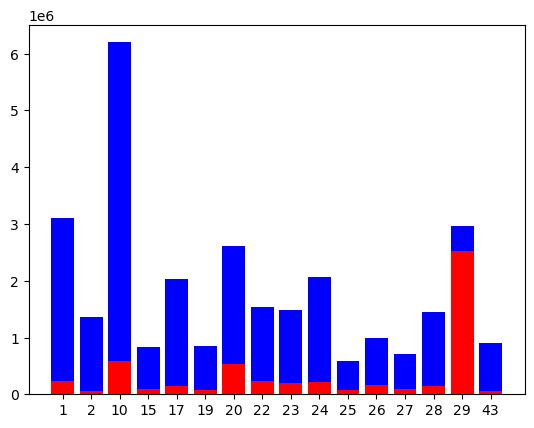

In [45]:
fig, axis = plt.subplots()
axis.bar(views_by_cat.index, views_by_cat, color='b',  linewidth=0.7)
axis.bar(comments_by_cat.index, comments_by_cat*30 ,color='r',  linewidth=0.7)
plt.show() 

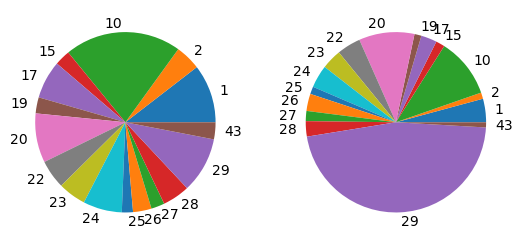

In [49]:
fig, ax = plt.subplots(nrows=1 , ncols=2)
ax[0].pie(views_by_cat, labels=views_by_cat.index)
ax[1].pie(comments_by_cat, labels=comments_by_cat.index)
plt.show() 